In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import statsmodels as sm
import statsmodels.api as sm
import scipy.stats as stats

In [138]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

In [139]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [140]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [141]:
customers.loc[customers['client_id'].duplicated(keep=False), :]

,client_id,sex,birth


In [142]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [143]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [144]:
products.loc[products['id_prod'].duplicated(keep = False), :]

,id_prod,price,categ


In [145]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [146]:
products_price = products.loc[~(products['price']<0)]

In [147]:
products_price.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [148]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [149]:
transactions.columns

Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')

In [150]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [151]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [152]:
transactions.loc[transactions.duplicated(keep = False), :]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [153]:
transactions_clean = transactions.loc[~(transactions['id_prod'] == 'T_0')]

In [154]:
transactions_clean["id_prod"] == "T_0"

0         False
1         False
2         False
3         False
4         False
          ...  
679527    False
679528    False
679529    False
679530    False
679531    False
Name: id_prod, Length: 679332, dtype: bool

In [155]:
transactions_clean['date'] = pd.to_datetime(transactions_clean['date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
transactions_clean.isnull().sum()

C:\Users\ZCWZ3296\AppData\Local\Temp\1\ipykernel_18012\4128442075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_clean['date'] = pd.to_datetime(transactions_clean['date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [156]:
transactions_clean

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [157]:
transactions_clean['year'] = transactions_clean['date'].dt.year
transactions_clean['month'] = transactions_clean['date'].dt.month
transactions_clean['day'] = transactions_clean['date'].dt.day
transactions_clean['day_of_week'] = transactions_clean['date'].dt.dayofweek
transactions_clean['hour'] = transactions_clean['date'].dt.hour
transactions_clean.isnull().sum()

C:\Users\ZCWZ3296\AppData\Local\Temp\1\ipykernel_18012\3322814242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_clean['year'] = transactions_clean['date'].dt.year
C:\Users\ZCWZ3296\AppData\Local\Temp\1\ipykernel_18012\3322814242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_clean['month'] = transactions_clean['date'].dt.month
C:\Users\ZCWZ3296\AppData\Local\Temp\1\ipykernel_18012\3322814242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

id_prod        0
date           0
session_id     0
client_id      0
year           0
month          0
day            0
day_of_week    0
hour           0
dtype: int64

In [158]:
products_transactions = pd.merge(products_price, transactions_clean, on='id_prod', how='inner')
products_transactions

,id_prod,price,categ,date,session_id,client_id,year,month,day,day_of_week,hour
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,2022,2,20,6,17
1,0_1421,19.99,0,2022-11-19 03:42:20.707442,s_299590,c_8364,2022,11,19,5,3
2,0_1421,19.99,0,2021-09-19 14:58:46.726179,s_92304,c_3544,2021,9,19,6,14
3,0_1421,19.99,0,2023-01-11 16:04:24.367855,s_325369,c_1025,2023,1,11,2,16
4,0_1421,19.99,0,2021-08-01 19:33:18.877168,s_70071,c_2298,2021,8,1,6,19
...,...,...,...,...,...,...,...,...,...,...,...
679106,1_140,38.56,1,2022-06-30 11:10:45.544437,s_231391,c_974,2022,6,30,3,11
679107,0_1920,25.16,0,2023-01-30 02:37:22.371278,s_334324,c_7748,2023,1,30,0,2
679108,0_1920,25.16,0,2021-04-13 18:36:10.252971,s_20115,c_7088,2021,4,13,1,18
679109,0_1920,25.16,0,2021-05-30 02:37:22.371278,s_41465,c_7748,2021,5,30,6,2


In [159]:
products_transactions.isnull().sum()

id_prod        0
price          0
categ          0
date           0
session_id     0
client_id      0
year           0
month          0
day            0
day_of_week    0
hour           0
dtype: int64

In [160]:
products_transactions['year'] = products_transactions['year'].apply(int)
products_transactions['month'] = products_transactions['month'].astype(int)
products_transactions['day'] = products_transactions['day'].apply(int)
products_transactions.head()

,id_prod,price,categ,date,session_id,client_id,year,month,day,day_of_week,hour
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,2022,2,20,6,17
1,0_1421,19.99,0,2022-11-19 03:42:20.707442,s_299590,c_8364,2022,11,19,5,3
2,0_1421,19.99,0,2021-09-19 14:58:46.726179,s_92304,c_3544,2021,9,19,6,14
3,0_1421,19.99,0,2023-01-11 16:04:24.367855,s_325369,c_1025,2023,1,11,2,16
4,0_1421,19.99,0,2021-08-01 19:33:18.877168,s_70071,c_2298,2021,8,1,6,19


In [161]:
products_transactions_year_month = products_transactions.groupby(['year', 'month'])['price'].sum().reset_index()
products_transactions_year_month['year_month'] = products_transactions_year_month['year'].astype(str) + '-' + products_transactions_year_month['month'].astype(str)
products_transactions_year_month['year_month'] = pd.to_datetime(products_transactions_year_month['year_month'], format='%Y-%m', errors='coerce')
products_transactions_year_month.head()

,year,month,price,year_month
0,2021,3,482440.61,2021-03-01
1,2021,4,476109.30,2021-04-01
2,2021,5,492943.47,2021-05-01
3,2021,6,484088.56,2021-06-01
4,2021,7,482835.40,2021-07-01


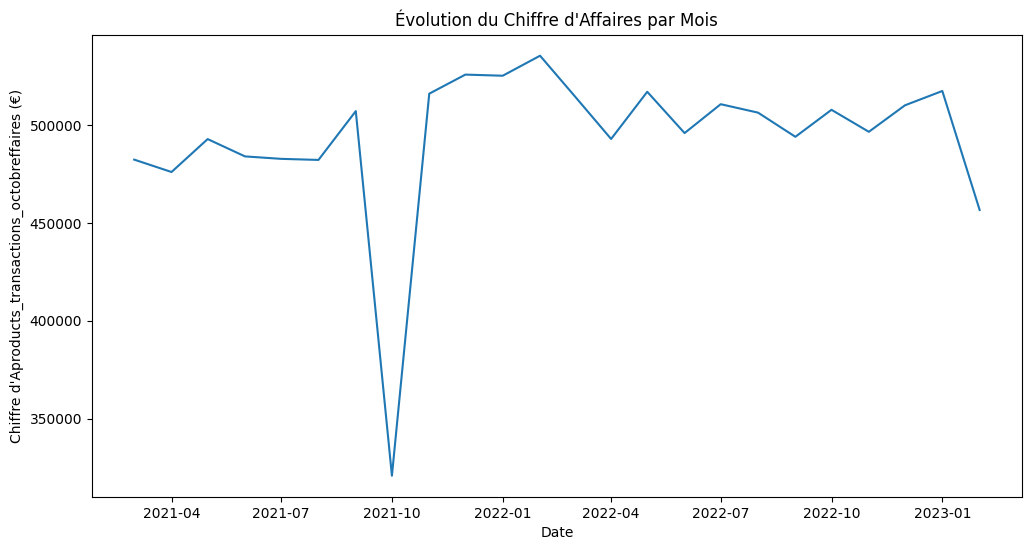

In [162]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=products_transactions_year_month, x='year_month', y='price')
plt.title('Évolution du Chiffre d\'Affaires par Mois')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'Aproducts_transactions_octobreffaires (€)')
plt.show()

Text(0.5, 0, 'Jours')

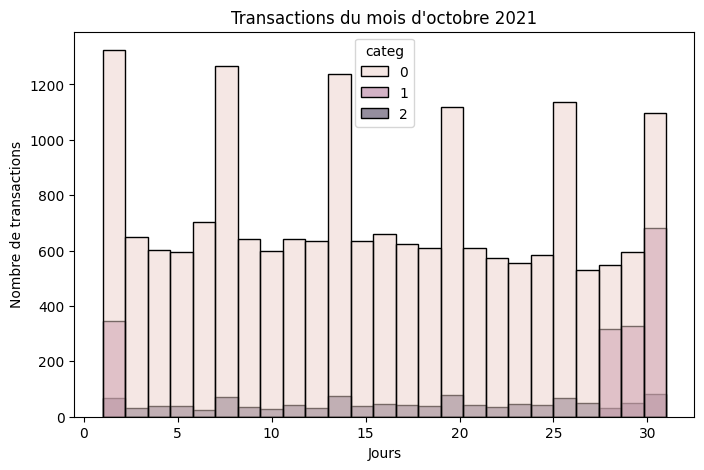

In [163]:
products_transactions_octobre = products_transactions[(products_transactions['month']==10) & (products_transactions['year'] == 2021)]
sns.histplot(data=products_transactions_octobre, x='day', hue='categ')
plt.title("Transactions du mois d'octobre 2021")
plt.ylabel("Nombre de transactions")
plt.xlabel("Jours")

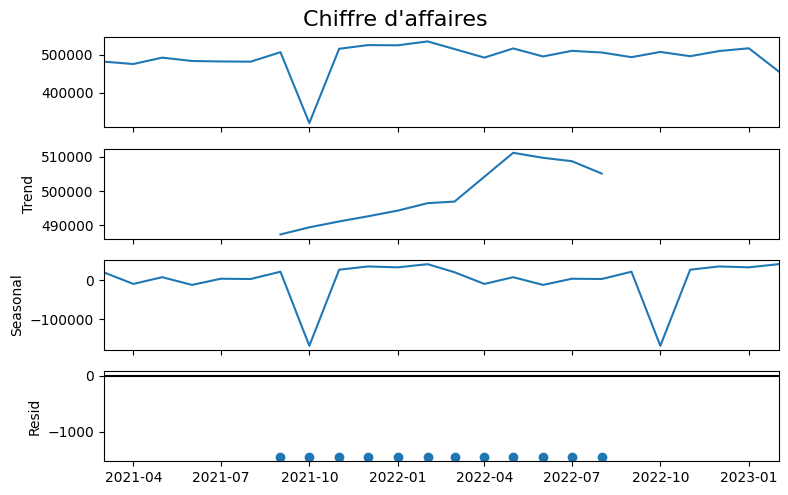

In [164]:
products_transactions_year_month['year_month'] = pd.to_datetime(products_transactions_year_month['year_month'])

products_transactions_year_month.set_index('year_month', inplace=True)

decomposition = sm.tsa.seasonal_decompose(products_transactions_year_month['price'], model='additive', period=12)

plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['agg.path.chunksize'] = 200  
plt.rcParams['path.simplify_threshold'] = 0.5 

fig = decomposition.plot()
fig.suptitle('Chiffre d\'affaires', fontsize=16)
fig.axes[0].set_title('')
plt.show()

In [165]:
ca_categorie = products_transactions.groupby('categ')['price'].sum().reset_index()
ca_categorie.head()

,categ,price
0,0,4419730.97
1,1,4653722.69
2,2,2780275.02


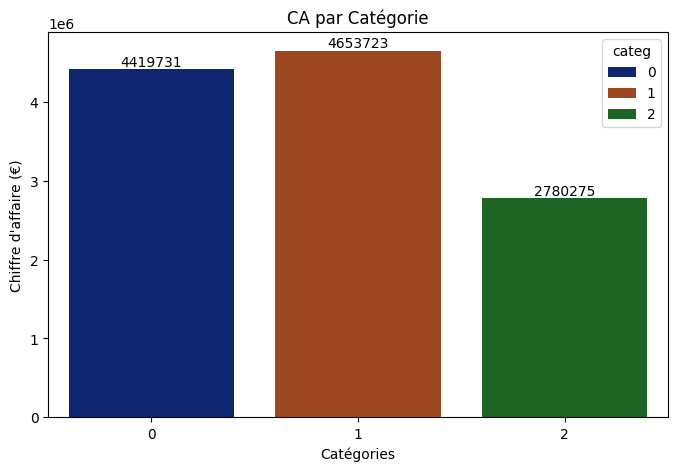

In [166]:
sns.barplot(data=ca_categorie, x ='categ', y = 'price', hue='categ', palette = 'dark')
plt.title("CA par Catégorie")
plt.xlabel("Catégories")
plt.ylabel("Chiffre d'affaire (€)")
plt.xticks([0, 1, 2])
ca = ca_categorie['price'].tolist()
for i, value in enumerate(ca):
 plt.text(i, value + 0.5, str(round(value)), ha='center', va='bottom')

In [167]:
vente_categ = products_transactions.groupby('categ')['session_id'].count().reset_index()
vente_categ

,categ,session_id
0,0,415459
1,1,227169
2,2,36483


C:\Users\ZCWZ3296\AppData\Local\Temp\1\ipykernel_18012\3242546127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vente_categ, x = 'session_id', y = 'categ', orient='h', palette='colorblind')


Text(0, 0.5, 'Catégorie')

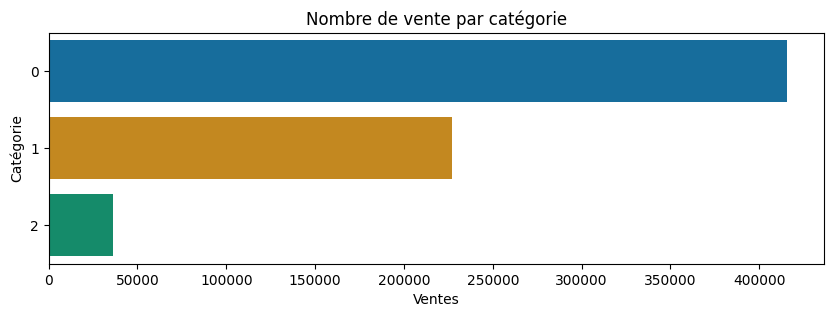

In [168]:
plt.figure(figsize=(10,3))
sns.barplot(data=vente_categ, x = 'session_id', y = 'categ', orient='h', palette='colorblind')
plt.title('Nombre de vente par catégorie')
plt.xlabel('Ventes')
plt.ylabel('Catégorie')

Text(0.5, 1.0, "Part de chaque catégorie au sein du chiffre d'affaire")

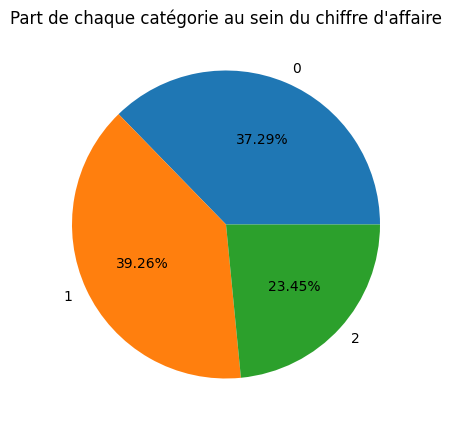

In [169]:
plt.pie(x=ca_categorie['price'], labels=ca_categorie['categ'], autopct='%.2f%%')
plt.title("Part de chaque catégorie au sein du chiffre d'affaire")

In [170]:
cumule_livre = products_transactions.groupby(['id_prod', 'categ'])['price'].sum().reset_index()
cumule_livre.head()

,id_prod,categ,price
0,0_0,0,4657.50
1,0_1,0,5352.13
2,0_10,0,394.90
3,0_100,0,61.80
4,0_1000,0,2954.88


Text(0, 0.5, 'CA par Livre (€)')

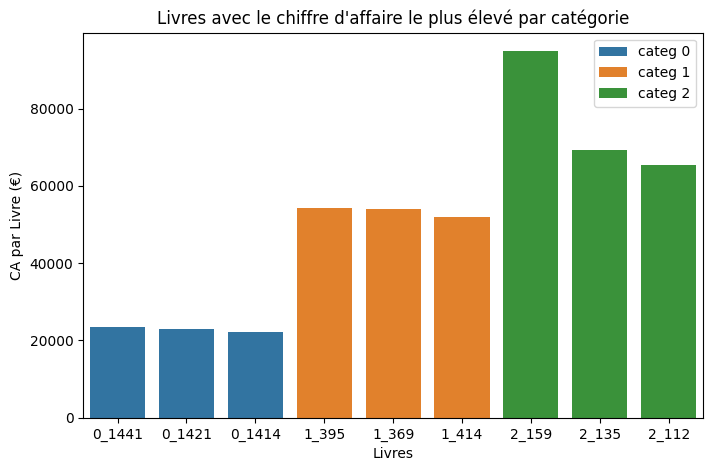

In [171]:
df1 = cumule_livre.loc[cumule_livre['categ'] == 0].sort_values(by=['price'], ascending=False).head(3)
df2 = cumule_livre.loc[cumule_livre['categ'] == 1].sort_values(by=['price'], ascending=False).head(3)
df3 = cumule_livre.loc[cumule_livre['categ'] == 2].sort_values(by=['price'], ascending=False).head(3)

sns.barplot(data=df1, x='id_prod', y='price', label= 'categ 0')
sns.barplot(data=df2, x='id_prod', y='price', label= 'categ 1')
sns.barplot(data=df3, x='id_prod', y='price', label= 'categ 2')
plt.title("Livres avec le chiffre d'affaire le plus élevé par catégorie")
plt.xlabel("Livres")
plt.ylabel("CA par Livre (€)")

Text(0, 0.5, 'CA par Livre (€)')

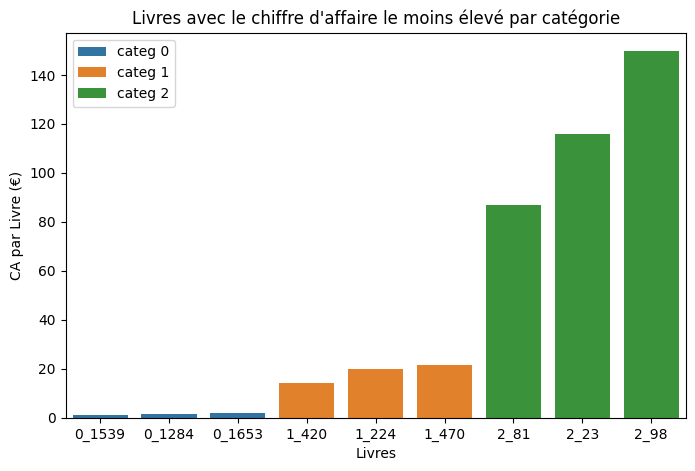

In [172]:
df4 = cumule_livre.loc[cumule_livre['categ'] == 0].sort_values(by=['price'], ascending=True).head(3)
df5 = cumule_livre.loc[cumule_livre['categ'] == 1].sort_values(by=['price'], ascending=True).head(3)
df6 = cumule_livre.loc[cumule_livre['categ'] == 2].sort_values(by=['price'], ascending=True).head(3)

sns.barplot(data=df4, x='id_prod', y='price', label= 'categ 0')
sns.barplot(data=df5, x='id_prod', y='price', label= 'categ 1')
sns.barplot(data=df6, x='id_prod', y='price', label= 'categ 2')
plt.title("Livres avec le chiffre d'affaire le moins élevé par catégorie")
plt.xlabel("Livres")
plt.ylabel("CA par Livre (€)")

In [173]:
nbr_vente = products_transactions.groupby(['id_prod', 'categ'])['session_id'].count().reset_index()
nbr_vente.head()

,id_prod,categ,session_id
0,0_0,0,1242
1,0_1,0,487
2,0_10,0,22
3,0_100,0,3
4,0_1000,0,432


Text(0, 0.5, 'Nombre de Ventes')

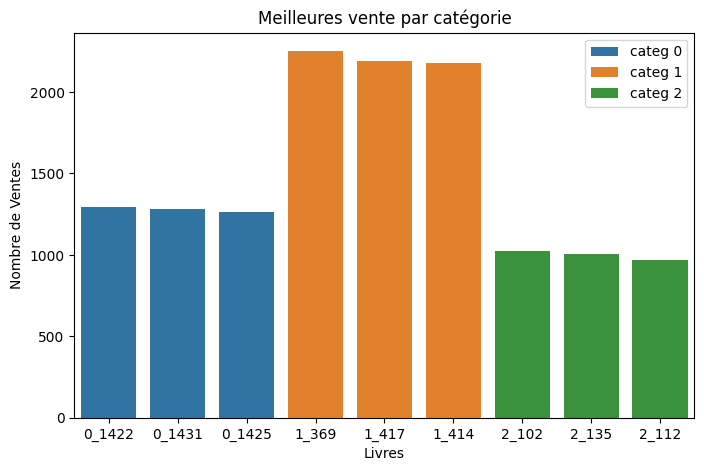

In [174]:
nbr_vente1 = nbr_vente.loc[nbr_vente['categ'] == 0].sort_values(by=['session_id'], ascending=False).head(3)
nbr_vente2 = nbr_vente.loc[nbr_vente['categ'] == 1].sort_values(by=['session_id'], ascending=False).head(3)
nbr_vente3 = nbr_vente.loc[nbr_vente['categ'] == 2].sort_values(by=['session_id'], ascending=False).head(3)

sns.barplot(data=nbr_vente1, x='id_prod', y='session_id', label= 'categ 0')
sns.barplot(data=nbr_vente2, x='id_prod', y='session_id', label= 'categ 1')
sns.barplot(data=nbr_vente3, x='id_prod', y='session_id', label= 'categ 2')
plt.title("Meilleures vente par catégorie")
plt.xlabel("Livres")
plt.ylabel("Nombre de Ventes")

Text(0, 0.5, 'Nombres de Ventes')

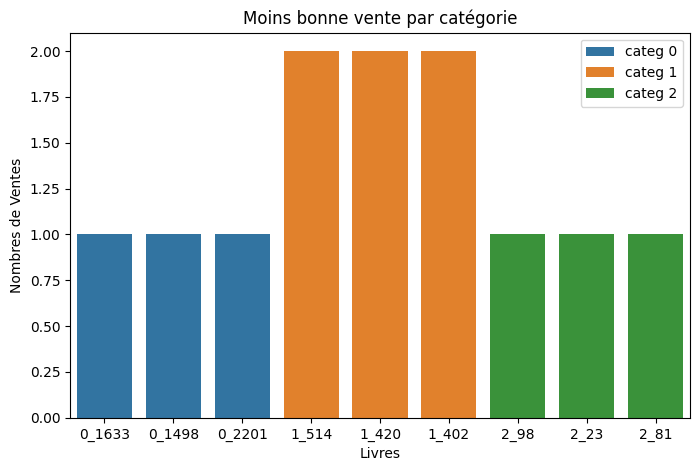

In [175]:
nbr_vente1 = nbr_vente.loc[nbr_vente['categ'] == 0].sort_values(by=['session_id'], ascending=True).head(3)
nbr_vente2 = nbr_vente.loc[nbr_vente['categ'] == 1].sort_values(by=['session_id'], ascending=True).head(3)
nbr_vente3 = nbr_vente.loc[nbr_vente['categ'] == 2].sort_values(by=['session_id'], ascending=True).head(3)

sns.barplot(data=nbr_vente1, x='id_prod', y='session_id', label= 'categ 0')
sns.barplot(data=nbr_vente2, x='id_prod', y='session_id', label= 'categ 1')
sns.barplot(data=nbr_vente3, x='id_prod', y='session_id', label= 'categ 2')
plt.title("Moins bonne vente par catégorie")
plt.xlabel("Livres")
plt.ylabel("Nombres de Ventes")

In [176]:
nbr_vente_categ = products_transactions.groupby(['categ'])['session_id'].count().reset_index()
nbr_vente_categ.head()

,categ,session_id
0,0,415459
1,1,227169
2,2,36483


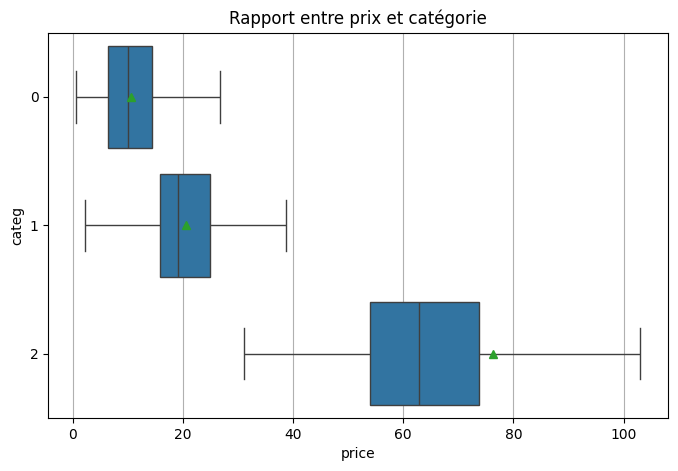

In [177]:
sns.boxplot(data=products_transactions, x="price", y="categ", orient ="h", showmeans=True, showfliers=False)
plt.title("Rapport entre prix et catégorie")
plt.grid(axis="x")

In [178]:
trasaction_customers = pd.merge(transactions_clean, customers, on = 'client_id')
trasaction_customers.head()

,id_prod,date,session_id,client_id,year,month,day,day_of_week,hour,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,4,13,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2,2,7,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,18,5,15,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,24,3,4,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,11,2,8,m,1980


In [179]:
trasaction_customers_products = pd.merge(trasaction_customers, products, on='id_prod')
trasaction_customers_products['age'] = 2024 - trasaction_customers_products['birth']
trasaction_customers_products.head()

,id_prod,date,session_id,client_id,year,month,day,day_of_week,hour,sex,birth,price,categ,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,4,13,f,1986,4.18,0,38
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2,2,7,m,1988,15.99,1,36
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,18,5,15,f,1968,7.99,0,56
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,24,3,4,m,2000,69.99,2,24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,11,2,8,m,1980,4.99,0,44


In [180]:
ca_client = trasaction_customers_products.groupby('client_id')['price'].sum().reset_index()
ca_client.head()

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


Text(0, 0.5, "Montant d'achat")

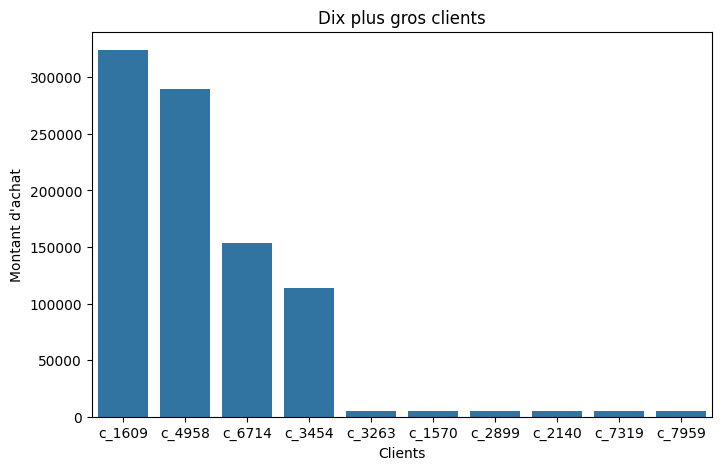

In [205]:
meilleur_client = ca_client.sort_values('price', ascending=False).head(10)
sns.barplot(data=meilleur_client, x='client_id', y='price')
plt.title("Dix plus gros clients")
plt.xlabel("Clients")
plt.ylabel("Montant d'achat")

In [182]:
data_b_to_c = trasaction_customers_products.loc[~(trasaction_customers_products['client_id'].isin(['c_1609', 'c_4958', 'c_6714', 'c_3454']))]

In [183]:
ca_client_b_to_c = data_b_to_c.groupby('client_id')['price'].sum().reset_index()
ca_client.head()

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


Text(0, 0.5, "Montant d'achat")

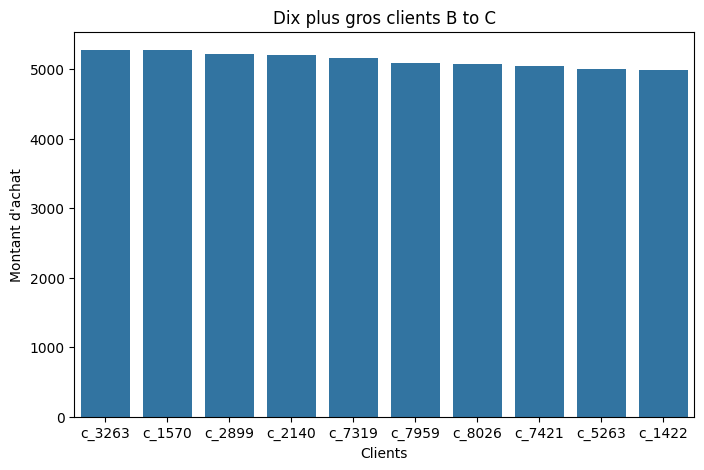

In [206]:
meilleur_client_b_to_c = ca_client_b_to_c.sort_values('price', ascending=False).head(10)
sns.barplot(data=meilleur_client_b_to_c, x='client_id', y='price')
plt.title("Dix plus gros clients B to C")
plt.xlabel("Clients")
plt.ylabel("Montant d'achat")


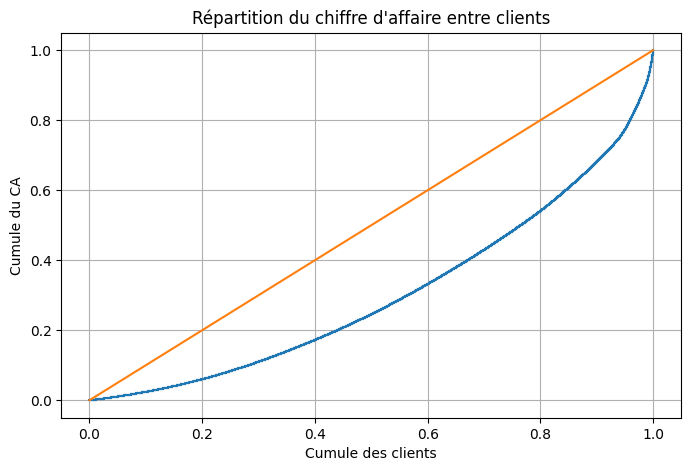

In [185]:
n = len(data_b_to_c)
lorenz = np.cumsum(np.sort(data_b_to_c['price'])) / data_b_to_c['price'].sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0,1+1/n,n+1)
plt.title("Répartition du chiffre d'affaire entre clients")
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1])
plt.xlabel('Cumule des clients')
plt.ylabel('Cumule du CA')
plt.grid()
plt.show()

In [186]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini =2*S
print(f"L'indice de gini est égal à {gini:.2}")

L'indice de gini est égal à 0.39


In [187]:
sex_categ = data_b_to_c.groupby(['sex', 'categ'])['price'].sum().reset_index()
sex_categ

,sex,categ,price
0,f,0,2132758.48
1,f,1,2285170.48
2,f,2,1288155.25
3,m,0,1986442.21
4,m,1,2064262.51
5,m,2,1215909.21


In [188]:
X = "sex"
Y = "categ"
cont = data_b_to_c[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,200793,111331,16980,329104
m,186488,101017,15868,303373
Total,387281,212348,32848,632477


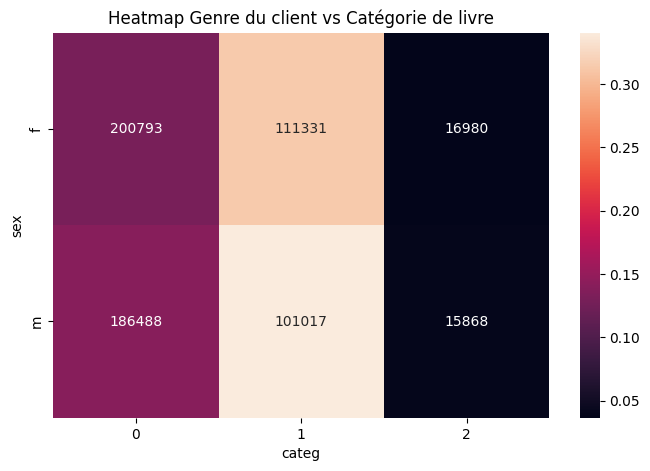

In [189]:
tx = cont.loc[:,['Total']]
ty = cont.loc[['Total'],:]
n = len(data_b_to_c)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],fmt=".0f", cbar_kws={'format': '%.2f'})
plt.title("Heatmap Genre du client vs Catégorie de livre")
plt.show()

In [190]:
age = data_b_to_c.groupby(['birth', 'age'])['price'].sum().reset_index()
age.head()

,birth,age,price
0,1929,95,3221.85
1,1930,94,4013.87
2,1931,93,2815.45
3,1932,92,5043.19
4,1933,91,5254.35


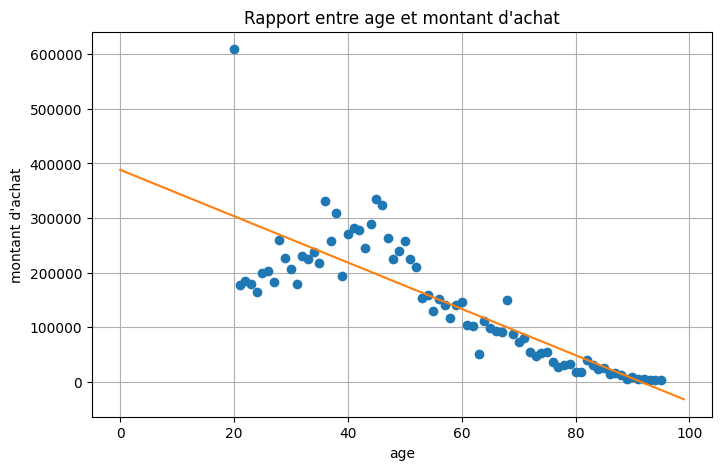

In [191]:
Y = age['price']
X = age[['age']]
X = X.copy()
X['intercept'] = 1
result = sm.OLS(Y, X).fit()
a, b = result.params['age'],result.params['intercept']
plt.title("Rapport entre age et montant d'achat")
plt.plot(age.age, age.price, "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("age")
plt.ylabel("montant d'achat")
plt.grid()
plt.show()

In [192]:
stat, p_value = stats.shapiro(age)
print(f"Test de Shapiro-Wilk: statistique={stat}, p-valeur={p_value}")
if p_value > 0.05:
    print("Les données suivent une loi normale")
else:
    print("Les données ne suivent pas une loi normale")

Test de Shapiro-Wilk: statistique=0.5882584149612187, p-valeur=5.516355115851871e-23
Les données ne suivent pas une loi normale


In [193]:
# Calcul de la corrélation de Spearman
coef, p_value = stats.spearmanr(age['age'], age['price'])
print(f"Corrélation de Spearman entre age et price: coefficient={coef}, p-valeur={p_value}")

Corrélation de Spearman entre age et price: coefficient=-0.8736842105263158, p-valeur=7.352708223159905e-25


In [194]:
frequence_achat = data_b_to_c.groupby('age')['session_id'].count().reset_index()
frequence_achat.head()

,age,session_id
0,20,15149
1,21,4371
2,22,4584
3,23,4252
4,24,4413


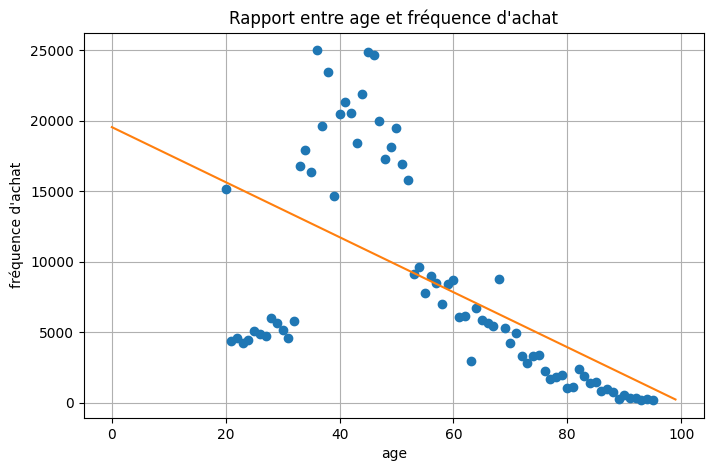

In [195]:
Y = frequence_achat['session_id']
X = frequence_achat[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a, b = result.params['age'],result.params['intercept']

plt.title("Rapport entre age et fréquence d'achat")
plt.plot(frequence_achat.age, frequence_achat.session_id, "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("age")
plt.ylabel("fréquence d'achat")
plt.grid()
plt.show()

In [196]:
stat, p_value = stats.shapiro(frequence_achat)
print(f"Test de Shapiro-Wilk: statistique={stat}, p-valeur={p_value}")
if p_value > 0.05:
    print("Les données suivent une loi normale")
else:
    print("Les données ne suivent pas une loi normale")

Test de Shapiro-Wilk: statistique=0.6697898472811039, p-valeur=5.070617690208215e-17
Les données ne suivent pas une loi normale


In [197]:
# Calcul de la corrélation de Spearman
coef, p_value = stats.spearmanr(frequence_achat['age'], frequence_achat['session_id'])
print(f"Corrélation de Spearman entre age et session_id: coefficient={coef}, p-valeur={p_value}")

Corrélation de Spearman entre age et session_id: coefficient=-0.6738255217212894, p-valeur=2.5445448455176546e-11


In [198]:
moyenne_panier = data_b_to_c.groupby('age')['price'].mean().reset_index()
moyenne_panier.head()

,age,price
0,20,40.201577
1,21,40.767737
2,22,40.178305
3,23,41.979704
4,24,37.391339


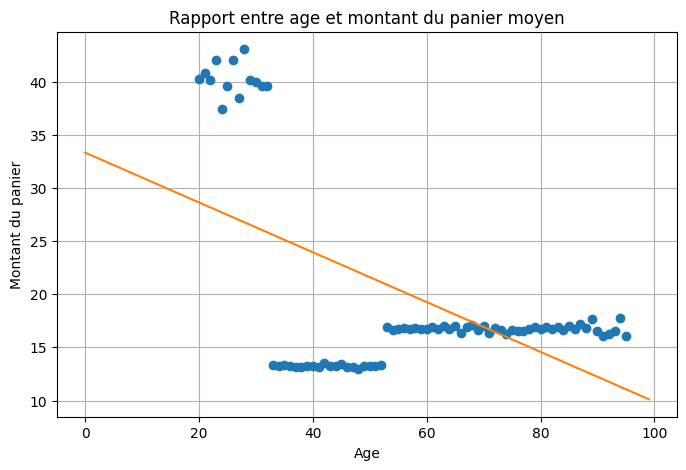

In [199]:
Y = moyenne_panier['price']
X = moyenne_panier[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a, b = result.params['age'],result.params['intercept']

plt.title("Rapport entre age et montant du panier moyen")
plt.plot(moyenne_panier.age, moyenne_panier.price, "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("Age")
plt.ylabel("Montant du panier")
plt.grid()
plt.show()

In [200]:
stat, p_value = stats.shapiro(moyenne_panier)
print(f"Test de Shapiro-Wilk: statistique={stat}, p-valeur={p_value}")
if p_value > 0.05:
    print("Les données suivent une loi normale")
else:
    print("Les données ne suivent pas une loi normale")

Test de Shapiro-Wilk: statistique=0.8568174481890964, p-valeur=7.399325573231867e-11
Les données ne suivent pas une loi normale


In [201]:
# Calcul de la corrélation de Spearman
coef, p_value = stats.spearmanr(moyenne_panier['age'], moyenne_panier['price'])
print(f"Corrélation de Spearman entre age et price: coefficient={coef}, p-valeur={p_value}")

Corrélation de Spearman entre age et price: coefficient=-0.08503075871496923, p-valeur=0.4651947762633266


C:\Users\ZCWZ3296\AppData\Local\Temp\1\ipykernel_18012\1009925643.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)


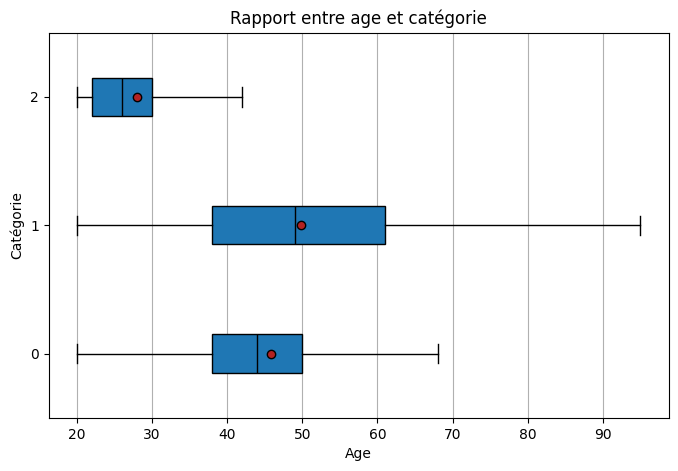

In [202]:
X = "categ"
Y = "age"

sous_echantillon = data_b_to_c.copy()
sous_echantillon["age"] = sous_echantillon["age"]
modalites =sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Rapport entre age et catégorie")
plt.grid(axis='x')
plt.xlabel("Age")
plt.ylabel("Catégorie")
plt.show()

In [203]:
stat, p_value = stats.shapiro(sous_echantillon['age'])
print(f"Test de Shapiro-Wilk: statistique={stat}, p-valeur={p_value}")
if p_value > 0.05:
    print("Les données suivent une loi normale")
else:
    print("Les données ne suivent pas une loi normale")

Test de Shapiro-Wilk: statistique=0.9717461636133701, p-valeur=3.670050624985426e-110
Les données ne suivent pas une loi normale


c:\Users\ZCWZ3296\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 632477.
  res = hypotest_fun_out(*samples, **kwds)


In [204]:
h_stat, p_value = stats.kruskal(sous_echantillon['age'],sous_echantillon['categ'])
print(h_stat)
print(p_value)

981632.1080480412
0.0
